In [1]:
from sklearn.multioutput import MultiOutputClassifier

from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import confusion_matrix

from utils import load_dataset, extract_final_losses, plot_training_error_curves, compute_performance_metrics, print_metrics_summary

In [2]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646, 2)
(97300, 243) (97300, 2)


In [3]:
gr = MultiOutputClassifier(GradientBoostingClassifier(n_iter_no_change=5))

In [4]:
gr.fit(x_train, y_train)

# 1h30min treinamento

MultiOutputClassifier(estimator=GradientBoostingClassifier(n_iter_no_change=5))

In [5]:
y_pred = gr.predict(x_test)
y_pred_proba = gr.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 0 0]


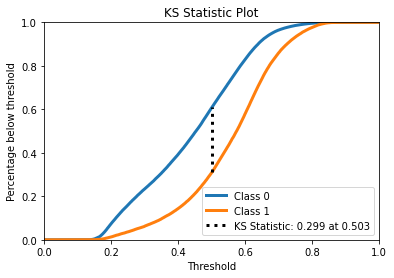


Accuracy:         0.6406
Recall:           0.6768
Precision:        0.4846
F1:               0.5648
AUROC:            0.7059
AUPR:             0.5454


In [12]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)